In [1]:
#EJERCICIO 1
# librerias que se van a necesitar-------------------------------
import os
import tarfile
import urllib.request
import pandas as pd
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL, 
housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
# se muestran las primeras 7 observaciones-----------------------
print(housing.head(7))
# el metodo por defecto muestra 5 observaciones------------------
print(housing.head())
# descriptivo de la base de datos--------------------------------
print(housing.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4   

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
test
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421

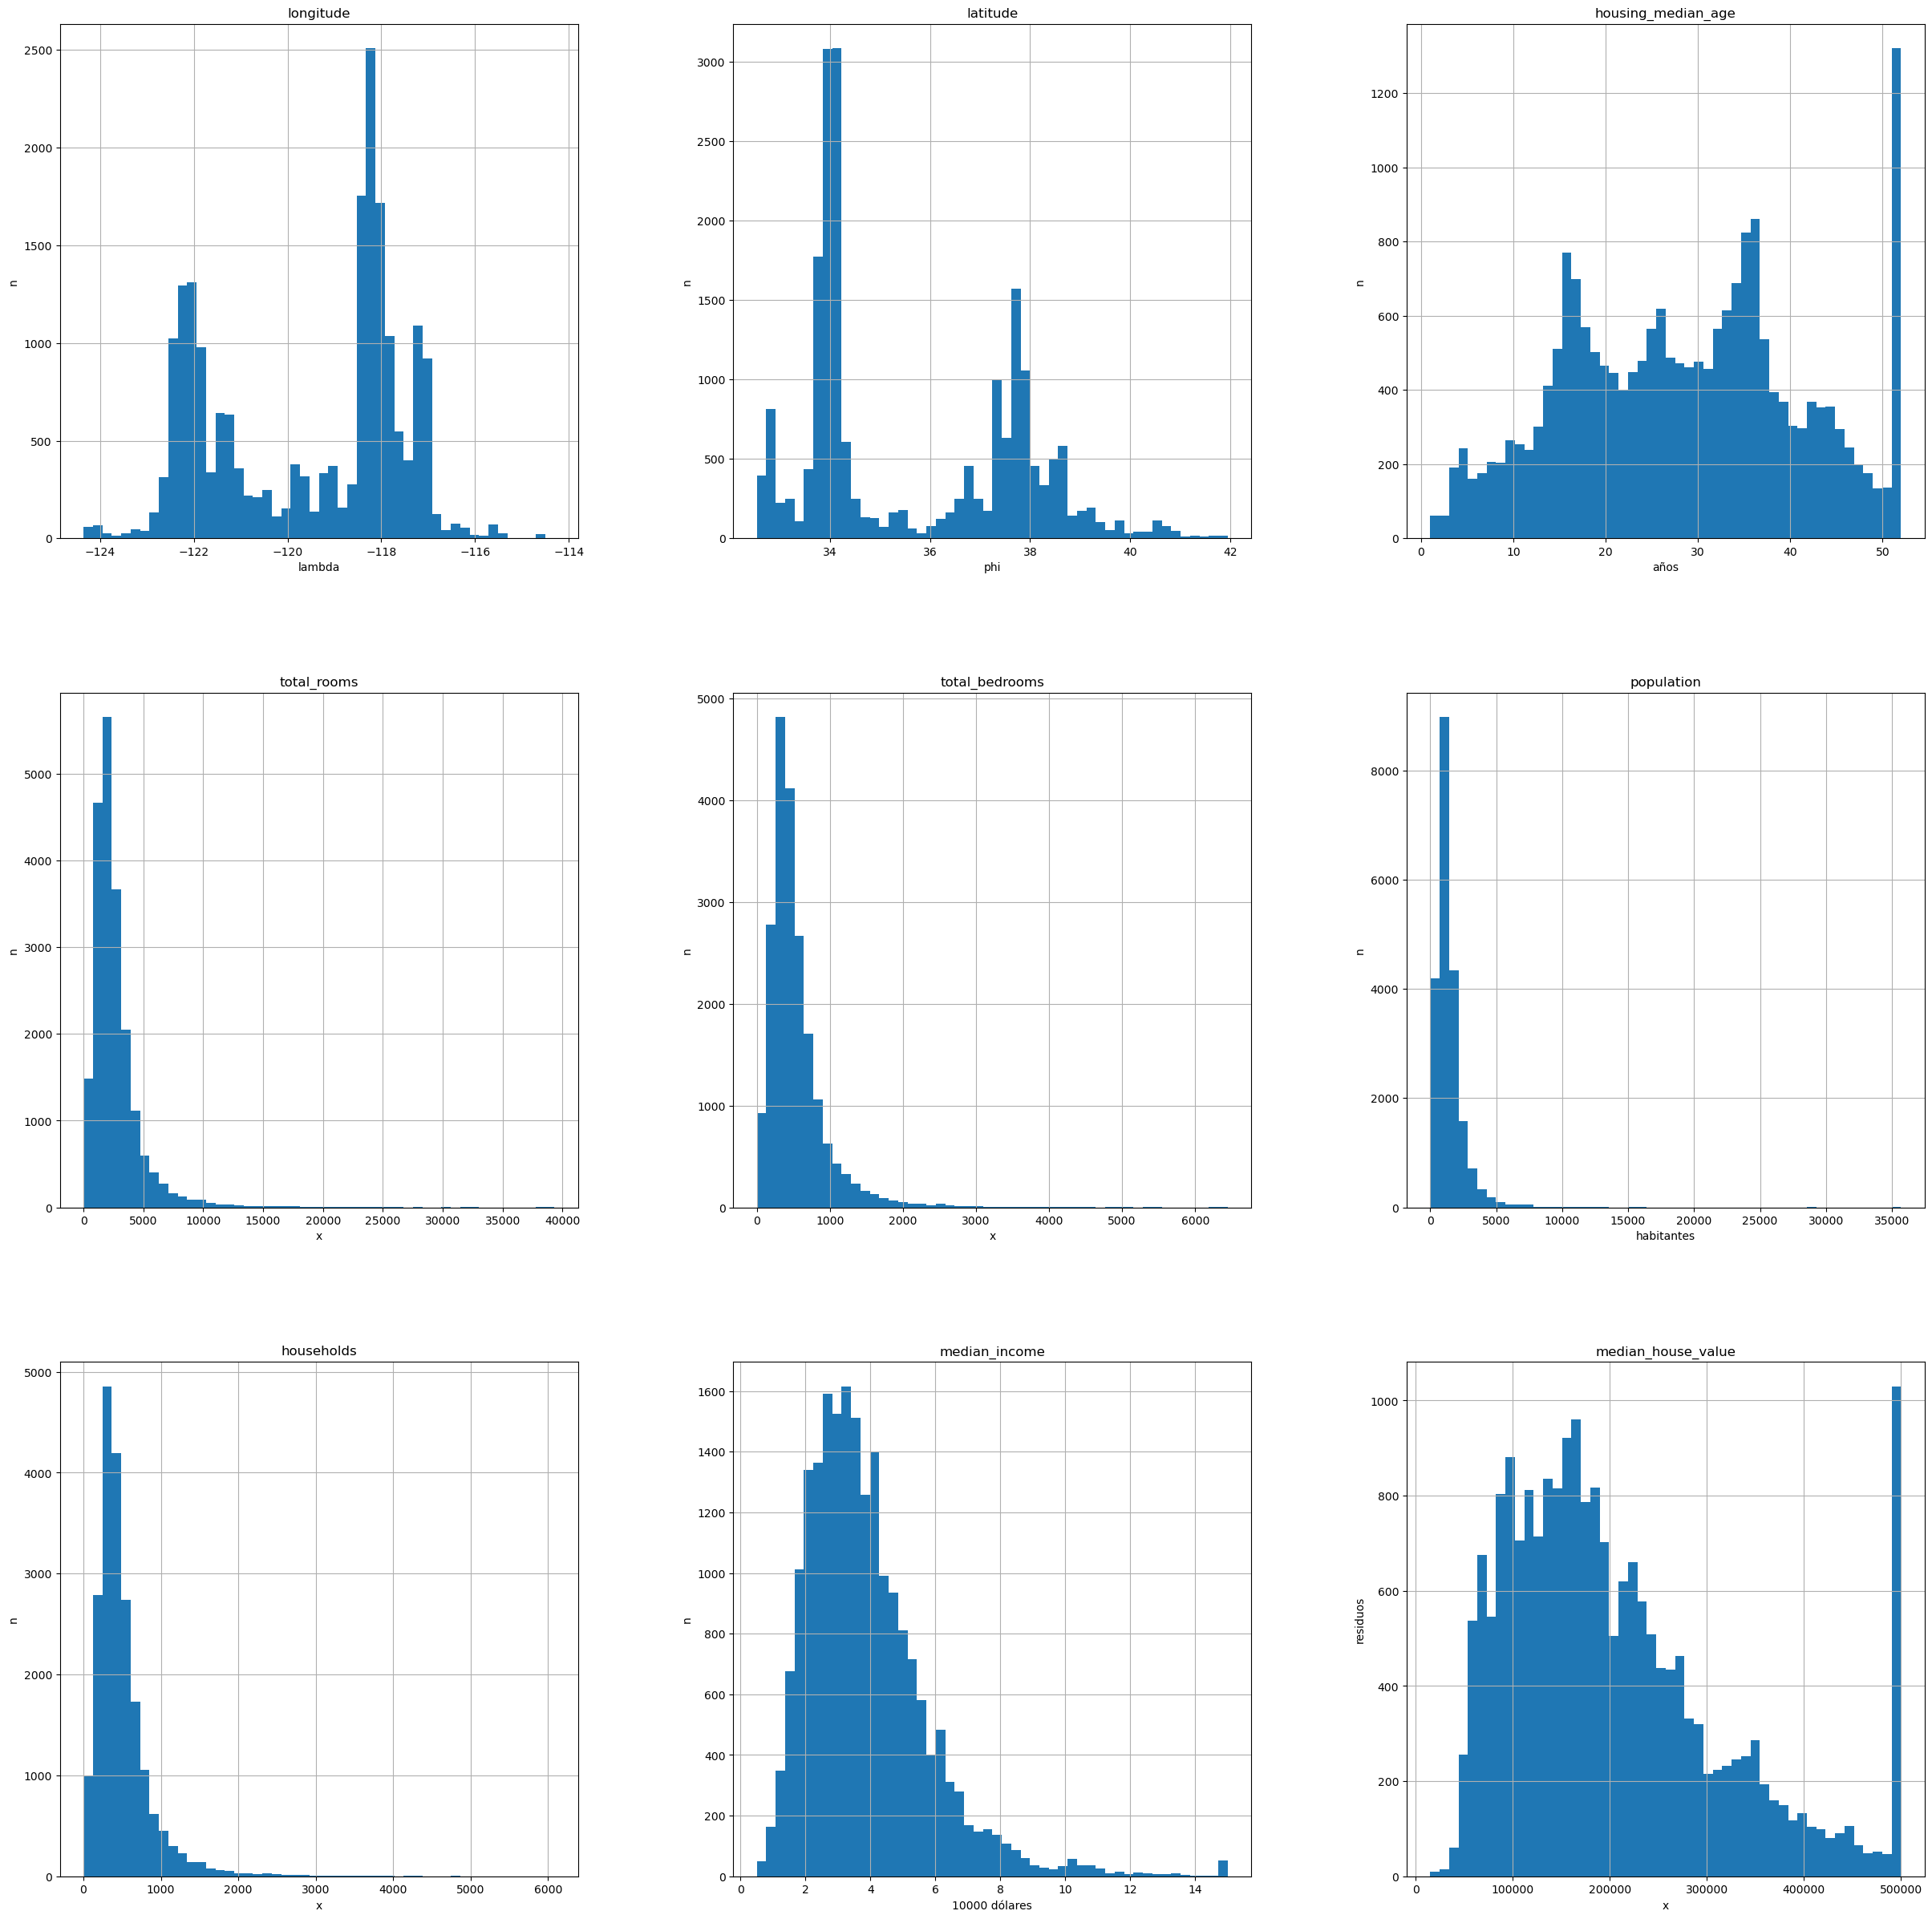

In [5]:
#EJERCICIO 2
# descriptivo de la variable ocean_proximity---------------------
print(housing["ocean_proximity"].value_counts())

# opciones para que muestre todas las columnas en el terminal
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# descriptivo de la base de datos--------------------------------
print(housing.describe())
print(housing["total_rooms"].describe())
# descriptivo de la base de datos--------------------------------
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# dividir los histogramas numericos------------------------------
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30,30))
# definir nombres ejes--------------------------------------------
# primera fila
axes[0,0].set_xlabel("lambda")
axes[0,0].set_ylabel("n")
axes[0,1].set_xlabel("phi")
axes[0,1].set_ylabel("n")
axes[0,2].set_xlabel("años")
axes[0,2].set_ylabel("n")
# segunda fila
axes[1,0].set_xlabel("x")
axes[1,0].set_ylabel("n")
axes[1,1].set_xlabel("x")
axes[1,1].set_ylabel("n")
axes[1,2].set_xlabel("habitantes")
axes[1,2].set_ylabel("n")
# tercera fila
axes[2,0].set_xlabel("x")
axes[2,0].set_ylabel("n")
axes[2,1].set_xlabel("10000 dólares")
axes[2,1].set_ylabel("n")
axes[2,2].set_xlabel("dólares")
axes[2,2].set_ylabel("n")
housing.hist(bins = 50, ax = axes);
plt.xlabel("x");
plt.ylabel("residuos");
plt.show();

In [3]:
#EJERCICIO 3
# definir semilla para que la particion sea la misma-------------
np.random.seed(3)
# definir funcion particiones------------------------------------
def particiones(dataset, test_part):
    test_part_size = int(len(dataset) * test_part)
    mezclar_indices = np.random.permutation(len(dataset))
    test_indices = mezclar_indices[:test_part_size]
    train_indices = mezclar_indices[test_part_size:]
    return dataset.iloc[train_indices], dataset.iloc[test_indices]
# usar funcion particiones con test_part 0.3---------------------
train_set, test_set = particiones(housing, 0.3)
# comprobar longitudes de los set de entrenamiento y de test-----
print(round(len(housing) * 0.7, 1))
print(len(train_set))
print(len(housing) * 0.3)
print(len(test_set))
# definir numero de particiones----------------------------------
n = 10
# crear lista del 1 al 10----------------------------------------
n_list = list(range(1,n+1))
# definir longitud de cada particion-----------------------------
part_size = int(len(housing) / n)
# barajar indices------------------------------------------------
mezclar_indices = np.random.permutation(len(housing))
# crear lista vacia----------------------------------------------
part_cv = {}
# asignar conjunto de indices------------------------------------
for i in n_list:
  part_i = mezclar_indices[part_size * (i-1):part_size * i]
  part_cv["part_{0}".format(i)] = housing.iloc[part_i]
# comprobar algunas longitudes de las particiones----------------
print(len(part_cv["part_1"]))
print(len(part_cv["part_2"]))
print(len(part_cv["part_10"]))
# comprobar cabeceros--------------------------------------------
print(part_cv["part_10"].head())

14448.0
14448
6192.0
6192
2064
2064
2064
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16480    -121.28     38.17                19.0       1337.0           236.0   
20591    -121.58     39.15                34.0       1376.0           376.0   
20358    -118.95     34.18                25.0       2237.0           331.0   
20615    -121.54     39.08                23.0       1076.0           216.0   
10250    -117.86     33.88                19.0       1621.0           328.0   

       population  households  median_income  median_house_value  \
16480       744.0       225.0         4.0924            244200.0   
20591       702.0       317.0         1.4946             55500.0   
20358      1121.0       365.0         6.0994            254900.0   
20615       724.0       197.0         2.3598             57500.0   
10250       871.0       322.0         3.7361            201400.0   

      ocean_proximity  
16480          INLAND  
20591          INLAND  
203